# Cats vs Dogs Image Classification using CNN

In [0]:
import os, shutil
%tensorflow_version 2.x
from tensorflow.keras import models, layers, optimizers
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
### Mount google drive first ###
base_dir = os.getcwd() + '/drive/My Drive/Colab Notebooks/Deep Learning in Python/Deep Learning for Computer Vision'
original_dataset_dir = base_dir + '/kaggle_cat_dog_orig_smaller' # location of original uncompressed dataset

# Directories for train / validation /test data splits
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

# train
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

# validation
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

#test
test_cats_dir = os.path.join(test_dir, 'cats')
test_dogs_dir = os.path.join(test_dir, 'dogs')


# ###### Uncomment Below if directories don't exist ######

# os.mkdir(train_dir)
# os.mkdir(validation_dir)
# os.mkdir(test_dir)
# os.mkdir(train_cats_dir)
# os.mkdir(train_dogs_dir)
# os.mkdir(validation_cats_dir)
# os.mkdir(validation_dogs_dir)
# os.mkdir(test_cats_dir)
# os.mkdir(test_dogs_dir)

# # Move cat images
# fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
# for fname in fnames:
#   src = os.path.join(original_dataset_dir, fname)
#   dst = os.path.join(train_cats_dir, fname)
#   shutil.copyfile(src, dst)

# fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
# for fname in fnames:
#   src = os.path.join(original_dataset_dir, fname)
#   dst = os.path.join(validation_cats_dir, fname)
#   shutil.copyfile(src, dst)

# fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
# for fname in fnames:
#   src = os.path.join(original_dataset_dir, fname)
#   dst = os.path.join(test_cats_dir, fname)
#   shutil.copyfile(src, dst)

# # Move dog images
# fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
# for fname in fnames:
#   src = os.path.join(original_dataset_dir, fname)
#   dst = os.path.join(train_dogs_dir, fname)
#   shutil.copyfile(src, dst)

# fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
# for fname in fnames:
#   src = os.path.join(original_dataset_dir, fname)
#   dst = os.path.join(validation_dogs_dir, fname)
#   shutil.copyfile(src, dst)

# fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
# for fname in fnames:
#   src = os.path.join(original_dataset_dir, fname)
#   dst = os.path.join(test_dogs_dir, fname)
#   shutil.copyfile(src, dst)


In [0]:
dir_list = [train_cats_dir, train_dogs_dir, validation_cats_dir, validation_dogs_dir, test_cats_dir, test_dogs_dir]
for directory in dir_list:
  print(len(os.listdir(directory)))

1000
1000
500
500
500
500


In [0]:
# Define ConvNet architecture
# Increase number of filters progressively over network depth
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu')) 
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [0]:
model.compile(optimizer=optimizers.RMSprop(lr=1e-4),
              loss='binary_crossentropy',
              metrics=['acc'])

In [0]:
# Generators to process images from directories in batches
train_datagen = ImageDataGenerator(rescale=1/255) # rescale pixel values
test_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150), #Resize img to 150 x 150
    batch_size=20,
    class_mode='binary',
)

validation_generator = train_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [0]:
for data_batch, labels_batch in train_generator:
  print('data batch shape:', data_batch.shape)
  print('labels batch shape:', labels_batch.shape)
  break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [0]:
# #Load Model from file
# model = models.load_model(base_dir + '/cats_and_dogs_small_1.h5')

In [0]:
# Fit model with batch generator
history = model.fit(
    train_generator,
    steps_per_epoch=100,  #20*100 = 2000 train samples
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50   #20*50 = 1000 val samples
)

# Save trained model
model.save(base_dir + '/cats_and_dogs_small_1.h5')

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 100 steps, validate for 50 steps
Epoch 1/30
100/100 [==============================] - 1328s 13s/step - loss: 0.6845 - acc: 0.5565 - val_loss: 0.6610 - val_acc: 0.6160
Epoch 2/30
100/100 [==============================] - 11s 105ms/step - loss: 0.6397 - acc: 0.6205 - val_loss: 0.6304 - val_acc: 0.6270
Epoch 3/30
100/100 [==============================] - 10s 103ms/step - loss: 0.5870 - acc: 0.6835 - val_loss: 0.6429 - val_acc: 0.6160
Epoch 4/30
100/100 [==============================] - 10s 105ms/step - loss: 0.5541 - acc: 0.7055 - val_loss: 0.6012 - val_acc: 0.6740
Epoch 5/30
100/100 [==============================] - 11s 107ms/step - loss: 0.5336 - acc: 0.7225 - val_loss: 0.5823 - val_acc: 0.6780
Epoch 6/30
100/100 [==============================] - 10s 103ms/step - loss: 0.5046 - acc: 0.7615 - val_loss: 0.6755 - val_acc: 0.6450
Epoch 7/30
100/100 [==============================] - 10s 102ms/step - loss: 0.4802 - acc: 0.7775

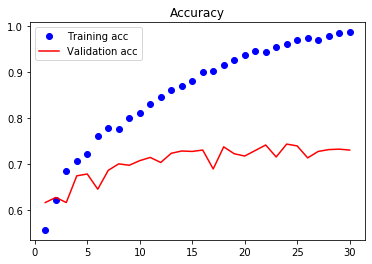

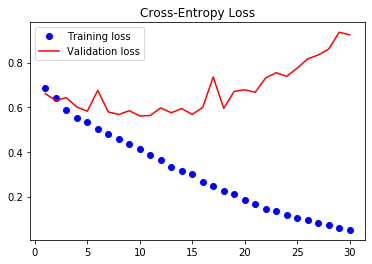

In [0]:
# Plot training/validation accuracy and loss
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Cross-Entropy Loss')
plt.legend()
plt.show()

The plots above indicate the network is overfitting the training data; the training accuracy is almost perfect, while the validation accuracy stalls at approximately 70%. A similar trend is observed with regards to cross-entropy loss.

One method to avoid overfitting on image data is **data augmentation**. To do so, we can add random transformations to training samples such that our model generalizes better.

In [0]:
# Setup data augmentation img generator - random transformations
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)


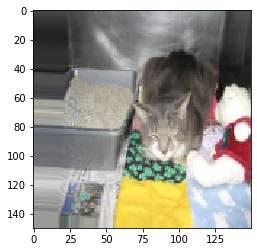

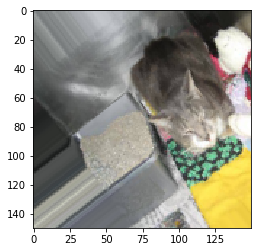

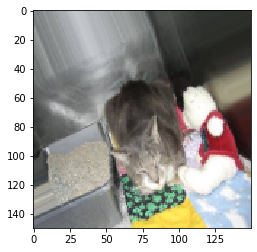

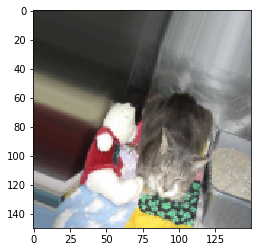

In [0]:
# Display random augmented images
fnames = [os.path.join(train_cats_dir, fname) for
         fname in os.listdir(train_cats_dir)]

img_path = fnames[3] #Select one image

img = image.load_img(img_path, target_size=(150, 150))
x = image.img_to_array(img)
x = x.reshape((1,) + x.shape) # Reshape to (1, 150, 150, 3)

i = 0
for batch in datagen.flow(x, batch_size=1):
  plt.figure(i)
  imgplot = plt.imshow(image.array_to_img(batch[0]))
  i+=1
  if i%4 == 0:
    break

plt.show()

In addition, we can modify our network's architecture to include a dropout layer to further reduce overfitting.

In [0]:
# Modify ConvNet - Include dropout layer
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu')) 
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(learning_rate=9e-5),
              loss='binary_crossentropy',
              metrics=['acc'])

In [0]:
# Retrain regularized model (data augmentation + dropout)
train_datagen = ImageDataGenerator(
    rescale=1/255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1/255) # NO AUGMENTATION OF VAL DATA

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary'
)

history = model.fit(
    train_generator,
    steps_per_epoch=100,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=50
)

# Save model
model.save(base_dir + '/cats_and_dogs_small_2.h5')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 100 steps, validate for 50 steps
Epoch 1/100
100/100 [==============================] - 19s 190ms/step - loss: 0.6950 - acc: 0.5075 - val_loss: 0.6869 - val_acc: 0.5010
Epoch 2/100
100/100 [==============================] - 19s 187ms/step - loss: 0.6856 - acc: 0.5440 - val_loss: 0.6666 - val_acc: 0.5870
Epoch 3/100
100/100 [==============================] - 18s 182ms/step - loss: 0.6763 - acc: 0.5725 - val_loss: 0.6805 - val_acc: 0.5570
Epoch 4/100
100/100 [==============================] - 18s 184ms/step - loss: 0.6683 - acc: 0.5745 - val_loss: 0.6451 - val_acc: 0.6180
Epoch 5/100
100/100 [==============================] - 18s 183ms/step - loss: 0.6598 - acc: 0.6135 - val_loss: 0.6620 - val_acc: 0.5910
Epoch 6/100
100/100 [==============================] - 18s 183ms/step - loss: 0.6429 - acc: 0.6345 - val_loss: 0.6921 - val_acc: 0.5640
Epoch 7

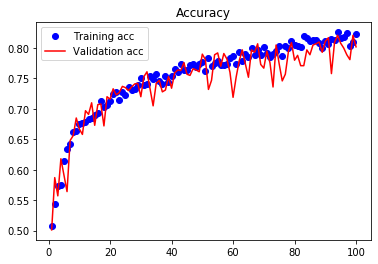

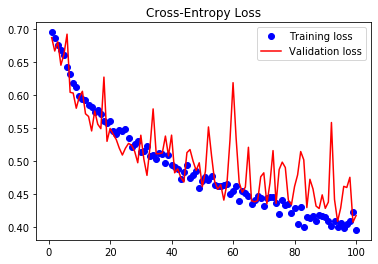

In [0]:
# Plot training/validation accuracy and loss - REGULARIZED MODEL
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Cross-Entropy Loss')
plt.legend()
plt.show()

Due to data augmentation and our dropout layer, the model is no longer overfitting, and results in an accuracy of ~82% on our validation data. This is an ~15% improvement over the unregularized model.